# Solution

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from solvers import solver
from fractions import Fraction
from tabulate import tabulate
import timeit

C:\Users\ASUS_USER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Implementation

[*Write code to be able to run three methods you have chosen for arbitrary initial conditions ($x(t=0), y(t=0)$), time step ($\mathrm{d}t$), model parameters ($\alpha, \beta, \gamma, \delta$) and functions $f$ and $g$. [50 words]*]

We have implement this code by defining few functions, rhs1, euler_method, exact_solution and more. The function rhs1 will return the right-hand side of the differential equations with given parameters and functions. euler_method is use to implement the Euler method to solve the differential equation system and exact_solution will return exact solution.

In [2]:
def rhs1(t: np.double, y: np.ndarray):
    return np.array([
        alpha * y[0] - beta * y[0] * y[1] + f_t(t),
        delta * y[0] * y[1] - gamma * y[1] + g_t(t)
    ])

def euler_method(x0, y0, t, T, delta_t, a, b, c, h):
    X = [x0]
    Y = [y0]
    t = [0]

    while t[-1] < T:
        next_X = X[-1] + (a * X[-1] - b * X[-1] * Y[-1] + f_t(t[-1])) * delta_t
        X.append(next_X)

        next_Y = Y[-1] + (c * X[-1] * Y[-1] - h * Y[-1] + g_t(t[-1])) * delta_t
        Y.append(next_Y)

        next_t = t[-1] + delta_t
        t.append(next_t)
        

    return t, X, Y

def exact_solution(t, T):
    t_Exact = [0]
    X_exact = [1 + np.cos(t_Exact[0])]
    Y_exact = [1 - np.cos(t_Exact[0])]
    
    while t_Exact[-1] < T:
        next_xExact = 1 + np.cos(t_Exact[-1])
        X_exact.append(next_xExact)

        next_yExact = 1 - np.cos(t_Exact[-1])
        Y_exact.append(next_yExact)
        
        next_tExact = t_Exact[-1] + delta_t
        t_Exact.append(next_tExact)
    return t_Exact, X_exact, Y_exact

x0 = 2.0
y0 = 0.0
t = 0
T = 2.5 * np.pi
alpha = 1.0
beta = 1.0
gamma = 1.0
delta = 1.0
time_steps= [T / 100, T / 200, T / 400, T / 800, T / 1600]
delta_t = time_steps[0]

def f_t(t):
    return -np.sin(t) - np.square(np.cos(t)) - np.cos(t)
    
def g_t(t):
    return np.sin(t) + np.square(np.cos(t)) - np.cos(t)

t_1, y_1 = solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Ralston-4")
t_2, y_2 = solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Heun")
t_euler, X_euler, Y_euler = euler_method(x0, y0, t, T, delta_t, alpha, beta, delta, gamma)
t_exact, X_exact, Y_exact = exact_solution(t, T)


## Results

[*Simulate and show results for each of the test cases suggested by your boss for a range of time steps until a final time $T$.
For test case A, you should use $T = 2.5\pi$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
For test case B, you should use $T = 30$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
You should demonstrate how solutions look for each method, and the accuracy and efficiency of each approach. [50 words]*]

We first test all the methods with test case 2a with the following time steps T/100, T/200, T/400, T/800, T/1600.

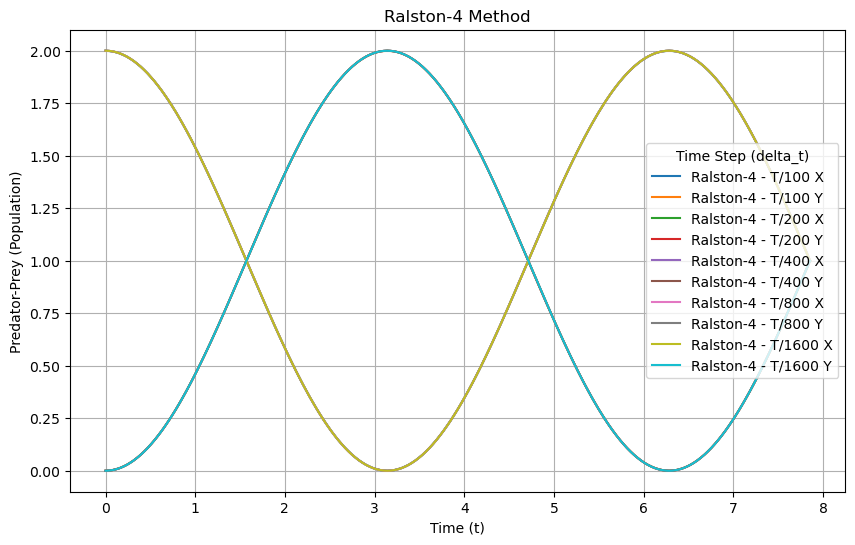

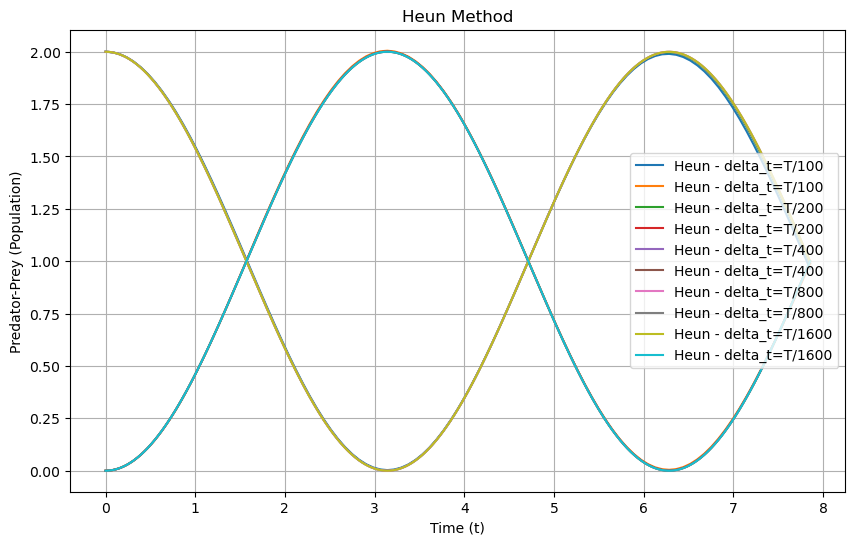

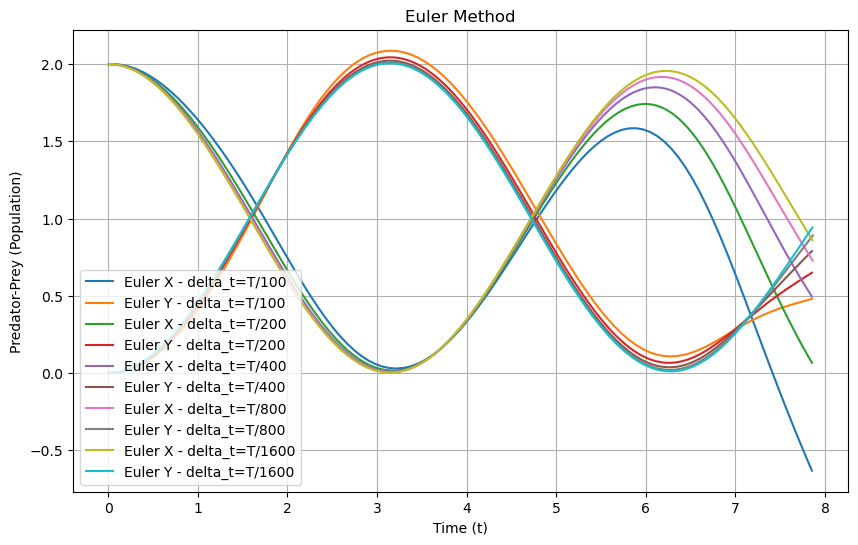

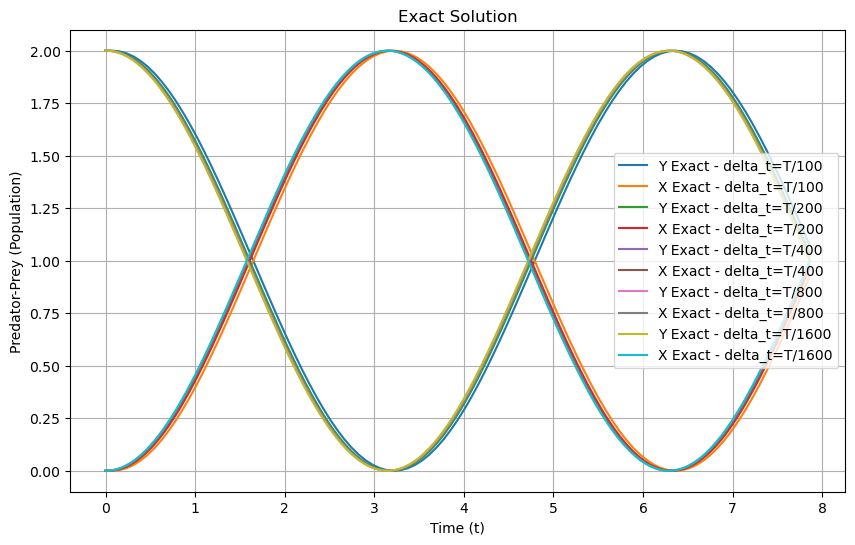

In [3]:
x0 = 2.0
y0 = 0.0
t = 0
T = 2.5 * np.pi
alpha = 1.0
beta = 1.0
gamma = 1.0
delta = 1.0
time_steps= [T / 100, T / 200, T / 400, T / 800, T / 1600]

def f_t(t):
    return -np.sin(t) - np.square(np.cos(t)) - np.cos(t)
    #return 0
    
def g_t(t):
    return np.sin(t) + np.square(np.cos(t)) - np.cos(t)
    #return 0


# Lists to store results for different time steps
results_ralston = []
results_heun = []
results_euler = []
results_exact = []

for delta_t in time_steps:
    t_1, y_1 = solver(rhs1, np.array([2.0, 0.0]), 0.0, delta_t, T, "Ralston-4")
    t_2, y_2 = solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Heun")
    t_euler, X_euler, Y_euler = euler_method(x0, y0, t, T, delta_t, alpha, beta, delta, gamma)
    t_exact, X_exact, Y_exact = exact_solution(t, T)

    y_1 = np.array(y_1)
    y_2 = np.array(y_2)

    results_ralston.append((t_1, y_1))
    results_heun.append((t_2, y_2))
    results_euler.append((t_euler, X_euler, Y_euler))
    results_exact.append((t_exact, X_exact, Y_exact))

plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_ralston):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, y[:, 0], label=f'Ralston-4 - {delta_t_label} X')
    plt.plot(t, y[:, 1], label=f'Ralston-4 - {delta_t_label} Y')

    
#(W3Schools, 2023), 
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Ralston-4 Method')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()
#  Heun
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_heun):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, y[:, 0], label=f'Heun - delta_t={delta_t_label}')
    plt.plot(t, y[:, 1], label=f'Heun - delta_t={delta_t_label}')
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Heun Method')
plt.legend()
plt.grid(True)
plt.show()

# Euler
plt.figure(figsize=(10, 6))
for i, (t, X, Y) in enumerate(results_euler):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, X, label=f'Euler X - delta_t={delta_t_label}')
    plt.plot(t, Y, label=f'Euler Y - delta_t={delta_t_label}')
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Euler Method')
plt.legend()
plt.grid(True)
plt.show()


# Exact solution
plt.figure(figsize=(10, 6))
for i, (t, X, Y) in enumerate(results_exact):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, X, label=f'Y Exact - delta_t={delta_t_label}')
    plt.plot(t, Y, label=f'X Exact - delta_t={delta_t_label}')
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Exact Solution')
plt.legend()
plt.grid(True)
plt.show()



Next, we will plot the difference between our 3 methods and the exact solution for test case 2a.

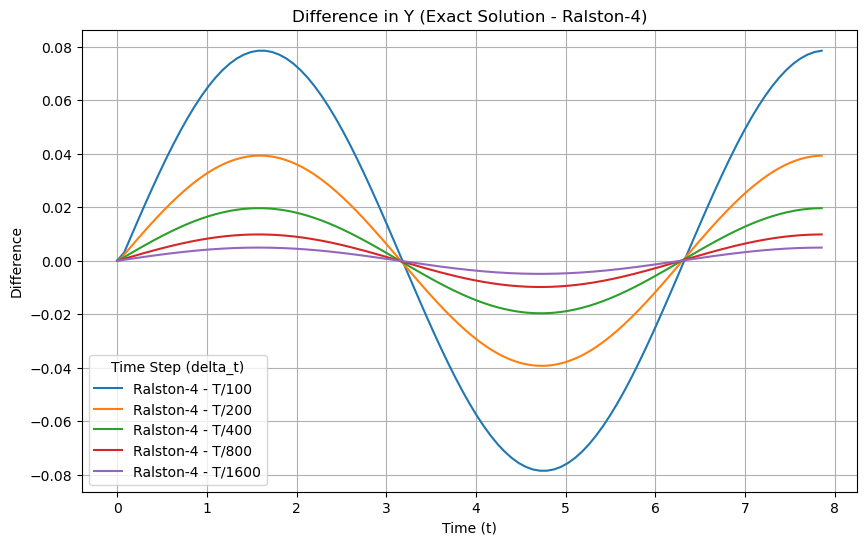

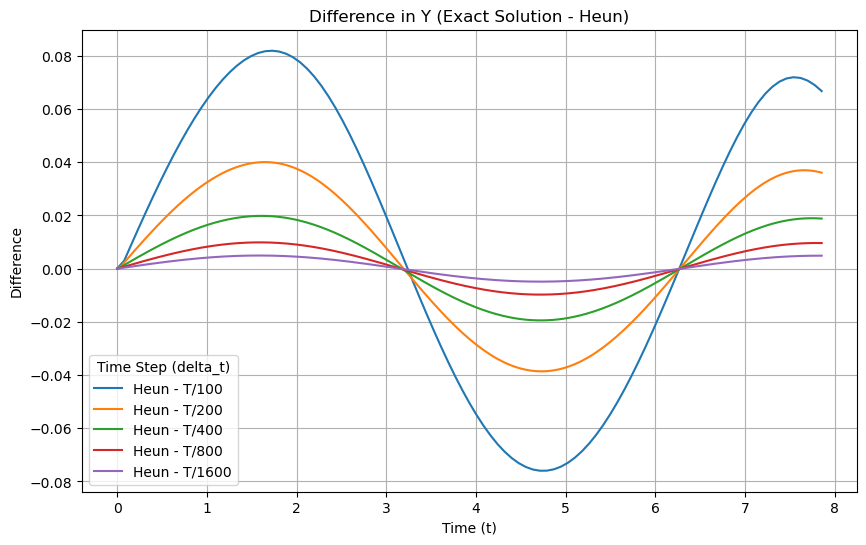

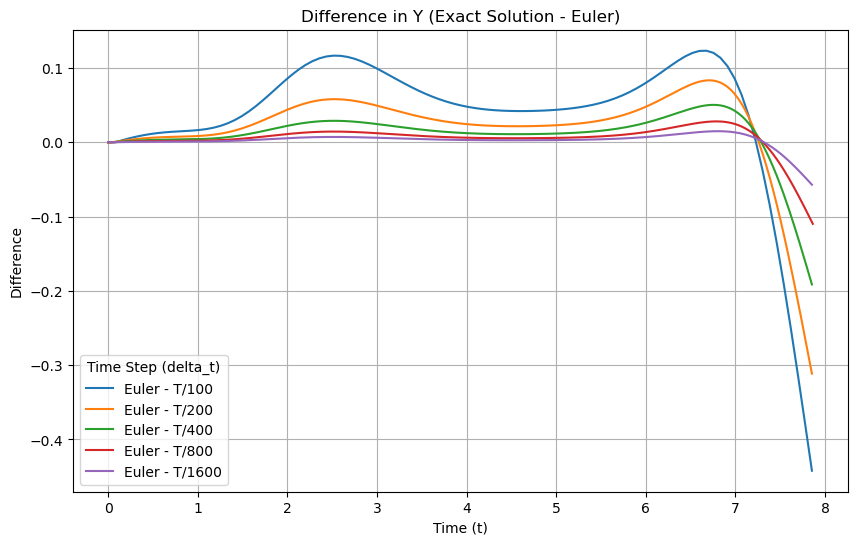

In [4]:
#Plot differences for Y

#Ralston-4
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_ralston):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    
    min_len = min(len(t), len(results_exact[i][0]))
    t = t[:min_len]

    len_y1 = len(y[:, 1])
    len_exact_y = len(results_exact[i][2])

    if len_y1 > min_len:
        y_diff_y = y[:, 1][:min_len] - results_exact[i][2]
    elif len_exact_y > min_len:
        y_diff_y = y[:, 1] - results_exact[i][2][:min_len]
    else:
        y_diff_y = y[:, 1] - results_exact[i][2]

    plt.plot(t, y_diff_y, label=f'Ralston-4 - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in Y (Exact Solution - Ralston-4)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()

#Heun
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_heun):
    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t), len(results_exact[i][0]))
    t = t[:min_len]

    y_diff_y = y[:, 1][:min_len] - results_exact[i][2][:min_len]

    plt.plot(t, y_diff_y, label=f'Heun - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in Y (Exact Solution - Heun)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()

#Euler
plt.figure(figsize=(10, 6))
for i, (t, X_euler, Y_euler) in enumerate(results_euler):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    t = t[:min_len]
    
    X_euler = np.array(X_euler)
    Y_euler = np.array(Y_euler)

    Y_diff = Y_euler[:min_len] - results_exact[i][2][:min_len]
    plt.plot(t, Y_diff, label=f'Euler - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in Y (Exact Solution - Euler)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()



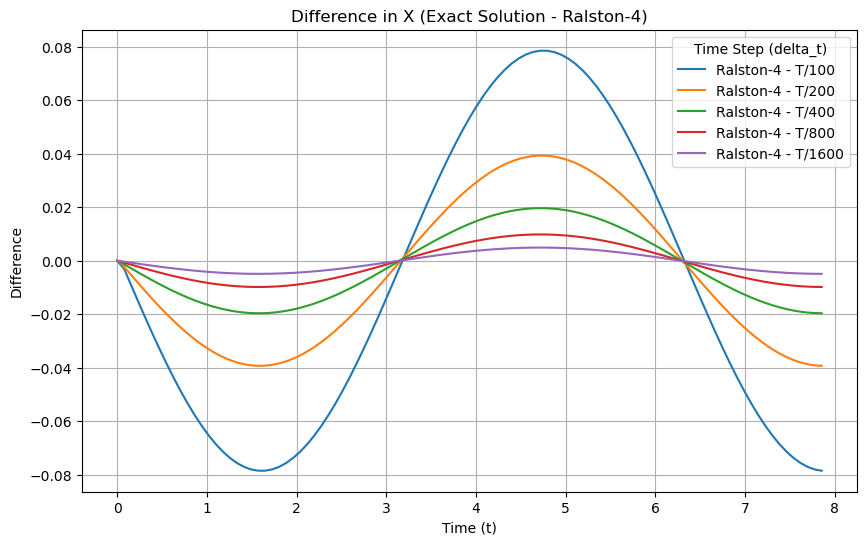

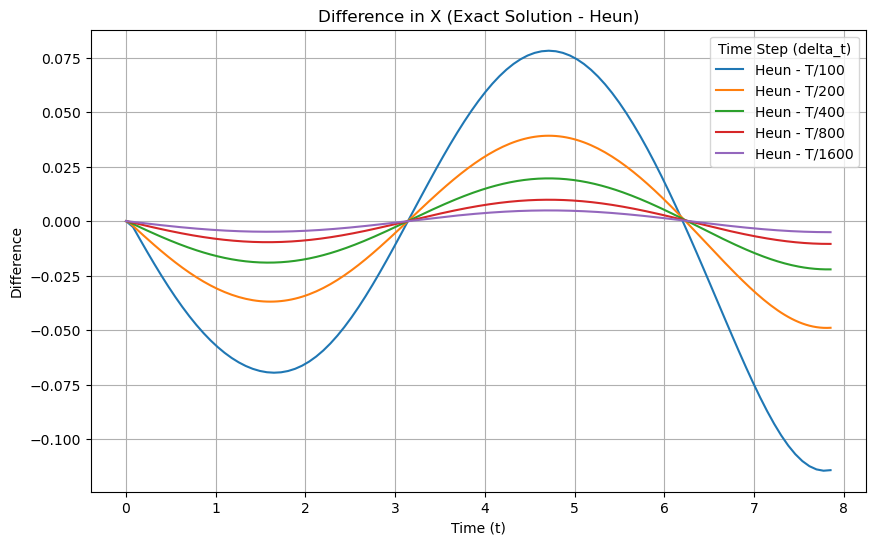

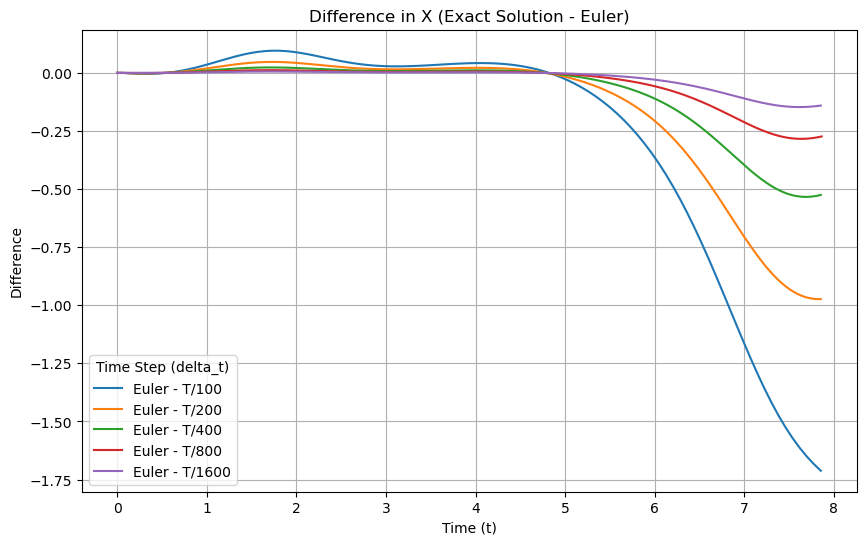

In [5]:
# Plot differences for X

#Ralston-4
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_ralston):
    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t), len(results_exact[i][0]))
    t = t[:min_len]

    len_y0 = len(y[:, 0])
    len_exact_x = len(results_exact[i][1])

    if len_y0 > min_len:
        y_diff_x = y[:, 0][:min_len] - results_exact[i][1]
    elif len_exact_x > min_len:
        y_diff_x = y[:, 0] - results_exact[i][1][:min_len]
    else:
        y_diff_x = y[:, 0] - results_exact[i][1]

    plt.plot(t, y_diff_x, label=f'Ralston-4 - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in X (Exact Solution - Ralston-4)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()

# Heun
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_heun):
    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t), len(results_exact[i][0]))
    t = t[:min_len]

    y_diff_x = y[:, 0][:min_len] - results_exact[i][1][:min_len]

    plt.plot(t, y_diff_x, label=f'Heun - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in X (Exact Solution - Heun)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()

# Euler
plt.figure(figsize=(10, 6))
for i, (t, X_euler, Y_euler) in enumerate(results_euler):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    t = t[:min_len]

    X_euler = np.array(X_euler)
    Y_euler = np.array(Y_euler)
    
    X_diff = X_euler[:min_len] - results_exact[i][1][:min_len]

    plt.plot(t, X_diff, label=f'Euler - {delta_t_label}')

plt.xlabel('Time (t)')
plt.ylabel('Difference')
plt.title('Difference in X (Exact Solution - Euler)')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()


Next, we will find the absolute errors for all three methods.

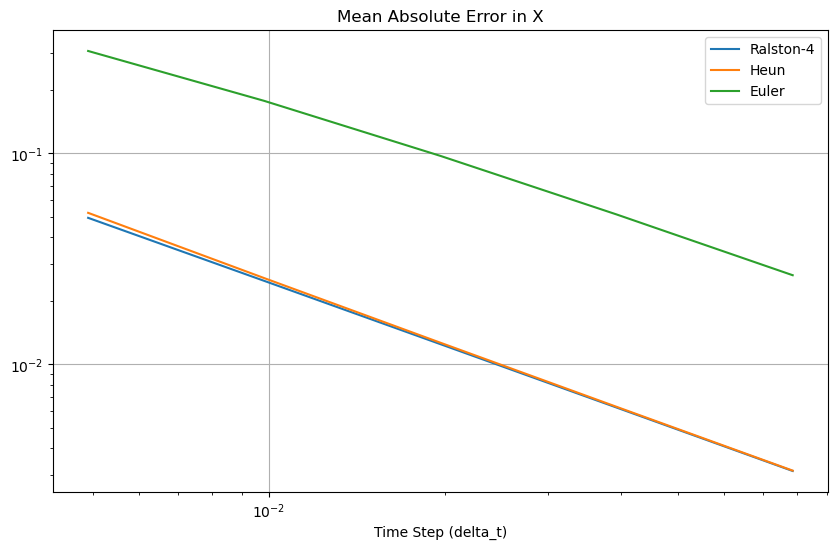

In [6]:
# Plot absolute errors for X
time_steps = [T / 1600, T / 800, T / 400, T / 200, T / 100]

# Initialize arrays to store absolute errors
abs_errors_ralston = []
abs_errors_heun = []
abs_errors_euler = []

#Ralston-4
plt.figure(figsize=(10, 6))
for i, (t_ralston, y_ralston) in enumerate(results_ralston):
    t_heun, y_heun = results_heun[i][0], results_heun[i][1]
    t_euler, X_euler, Y_euler = results_euler[i]

    delta_t_label = f'T/{int(T/time_steps[i])}'
    min_len = min(len(t_ralston), len(t_heun), len(t_euler))
    abs_error_ralston = np.abs(y_ralston[:min_len, 0] - results_exact[i][1][:min_len])
    abs_error_heun = np.abs(y_heun[:min_len, 0] - results_exact[i][1][:min_len])


    X_euler = np.array(X_euler)
    abs_error_euler = np.abs(X_euler[:min_len] - results_exact[i][1][:min_len])


    abs_errors_ralston.append(abs_error_ralston.mean())
    abs_errors_heun.append(abs_error_heun.mean())
    abs_errors_euler.append(abs_error_euler.mean())

plt.plot(time_steps, abs_errors_ralston, label='Ralston-4')
plt.plot(time_steps, abs_errors_heun, label='Heun')
plt.plot(time_steps, abs_errors_euler, label='Euler')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('')
plt.title('Mean Absolute Error in X')
plt.legend()
plt.grid(True)
plt.show()


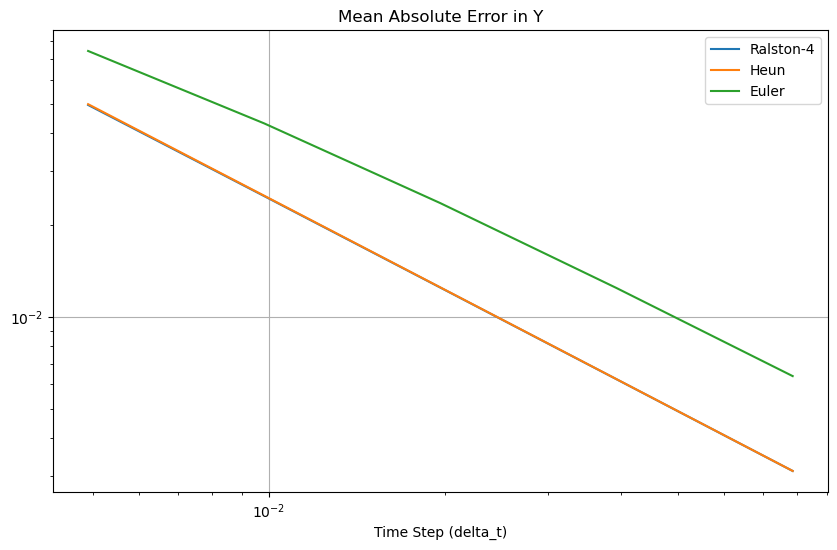

In [7]:
# Plot absolute errors for Y
time_steps = [T / 1600, T / 800, T / 400, T / 200, T / 100]

# Initialize arrays to store absolute errors
abs_errors_ralston = []
abs_errors_heun = []
abs_errors_euler = []

# Ralston-4
plt.figure(figsize=(10, 6))
for i, (t_ralston, y_ralston) in enumerate(results_ralston):
    t_heun, y_heun = results_heun[i][0], results_heun[i][1]
    t_euler, X_euler, Y_euler = results_euler[i]

    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t_ralston), len(t_heun), len(t_euler))

    abs_error_ralston = np.abs(y_ralston[:min_len, 1] - results_exact[i][2][:min_len])
    abs_error_heun = np.abs(y_heun[:min_len, 1] - results_exact[i][2][:min_len])

    Y_euler = np.array(Y_euler)
    abs_error_euler = np.abs(Y_euler[:min_len] - results_exact[i][2][:min_len])

    abs_errors_ralston.append(abs_error_ralston.mean())
    abs_errors_heun.append(abs_error_heun.mean())
    abs_errors_euler.append(abs_error_euler.mean())

plt.plot(time_steps, abs_errors_ralston, label='Ralston-4')
plt.plot(time_steps, abs_errors_heun, label='Heun')
plt.plot(time_steps, abs_errors_euler, label='Euler')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('')
plt.title('Mean Absolute Error in Y')
plt.legend()
plt.grid(True)
plt.show()


Next, we will record the runtime and take the average for test case 2a.

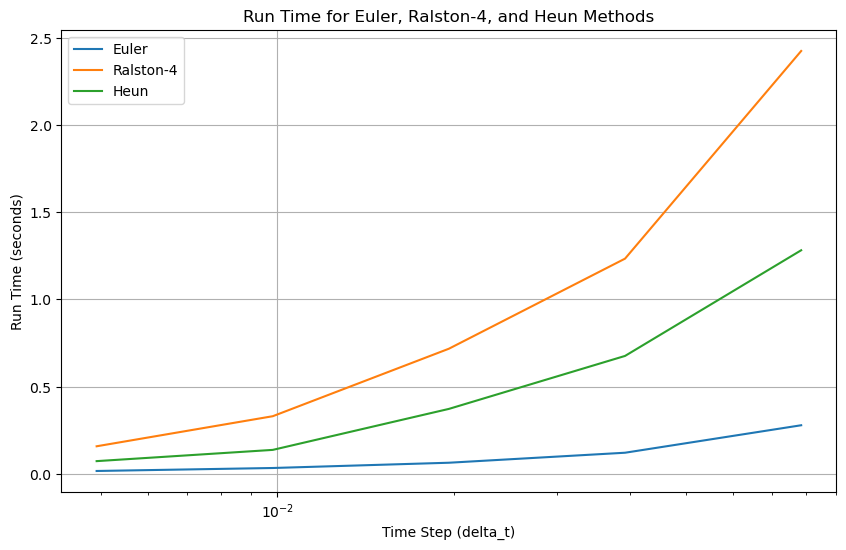

In [8]:
import timeit
import matplotlib.pyplot as plt


def euler_method_timing():
    return euler_method(x0, y0, t, T, delta_t, alpha, beta, delta, gamma)

def ralston_4_timing():
    return solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Ralston-4")

def heun_timing():
    return solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Heun")

time_steps = [T / 1600, T / 800, T / 400, T / 200, T / 100]

euler_runtimes = []
ralston_4_runtimes = []
heun_runtimes = []


for delta_t in time_steps:
    euler_time = timeit.timeit(euler_method_timing, number=10)
    ralston_4_time = timeit.timeit(ralston_4_timing, number=10)
    heun_time = timeit.timeit(heun_timing, number=10)

    euler_runtimes.append(euler_time)
    ralston_4_runtimes.append(ralston_4_time)
    heun_runtimes.append(heun_time)

plt.figure(figsize=(10, 6))
plt.plot(time_steps[::-1], euler_runtimes, label='Euler')
plt.plot(time_steps[::-1], ralston_4_runtimes, label='Ralston-4')
plt.plot(time_steps[::-1], heun_runtimes, label='Heun')

plt.xscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('Run Time (seconds)')
plt.title('Run Time for Euler, Ralston-4, and Heun Methods')
plt.legend()
plt.grid(True)
plt.show()


We first test all the methods with test case 2b with the following time steps T/100, T/200, T/400, T/800, T/1600.

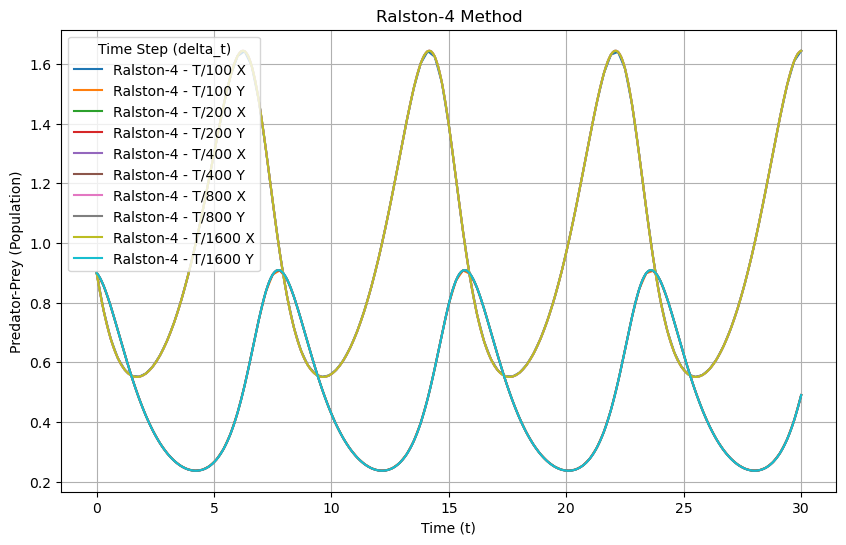

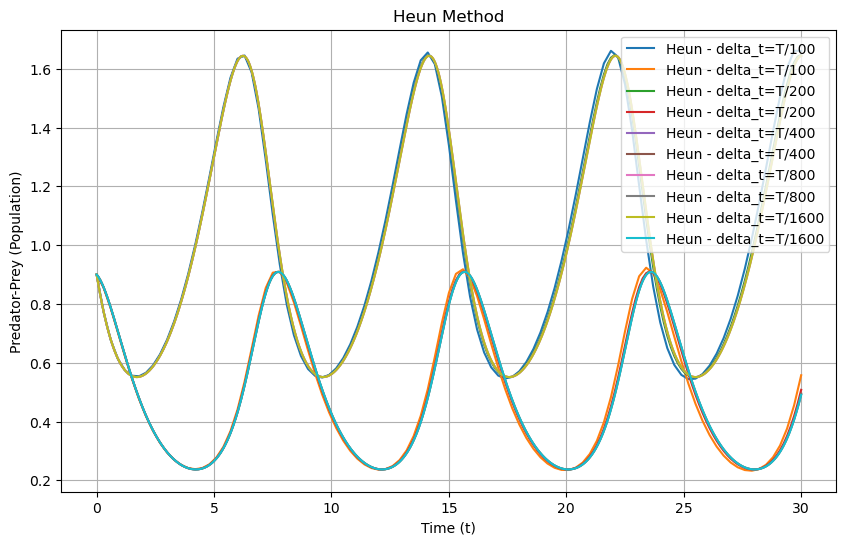

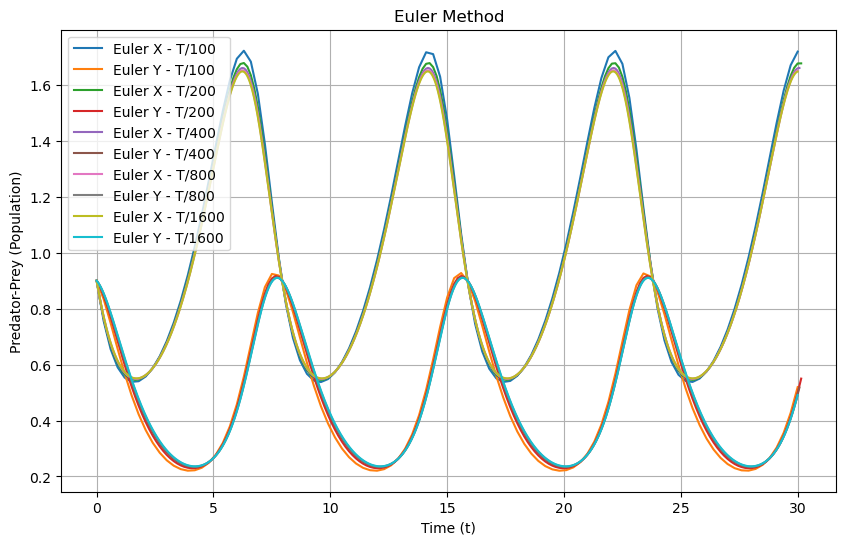

In [9]:
#Test case 2b

x0 = 0.9
y0 = 0.9
t = 0
T = 30
alpha = 2/3
beta = 4/3
gamma = 1.0
delta = 1.0
time_steps= [T / 100, T / 200, T / 400, T / 800, T / 1600]

def f_t(t):
    return 0
    
def g_t(t):
    return 0

results_ralston = []
results_heun = []
results_euler = []
results_exact = []

for delta_t in time_steps:
    t_1, y_1 = solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Ralston-4")
    t_2, y_2 = solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Heun")
    t_euler, X_euler, Y_euler = euler_method(x0, y0, t, T, delta_t, alpha, beta, delta, gamma)
    t_exact, X_exact, Y_exact = exact_solution(t, T)

    y_1 = np.array(y_1)
    y_2 = np.array(y_2)

    results_ralston.append((t_1, y_1))
    results_heun.append((t_2, y_2))
    results_euler.append((t_euler, X_euler, Y_euler))
    results_exact.append((t_exact, X_exact, Y_exact))

plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_ralston):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, y[:, 0], label=f'Ralston-4 - {delta_t_label} X')
    plt.plot(t, y[:, 1], label=f'Ralston-4 - {delta_t_label} Y')

plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Ralston-4 Method')
plt.legend(title='Time Step (delta_t)')
plt.grid(True)
plt.show()
# Heun
plt.figure(figsize=(10, 6))
for i, (t, y) in enumerate(results_heun):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, y[:, 0], label=f'Heun - delta_t={delta_t_label}')
    plt.plot(t, y[:, 1], label=f'Heun - delta_t={delta_t_label}')
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Heun Method')
plt.legend()
plt.grid(True)
plt.show()

# Euler
plt.figure(figsize=(10, 6))
for i, (t, X, Y) in enumerate(results_euler):
    delta_t_label = f'T/{int(T/time_steps[i])}'
    plt.plot(t, X, label=f'Euler X - {delta_t_label}')
    plt.plot(t, Y, label=f'Euler Y - {delta_t_label}')
plt.xlabel('Time (t)')
plt.ylabel('Predator-Prey (Population)')
plt.title('Euler Method')
plt.legend()
plt.grid(True)
plt.show()


Next, we will plot the difference between our 3 methods for test case 2b.

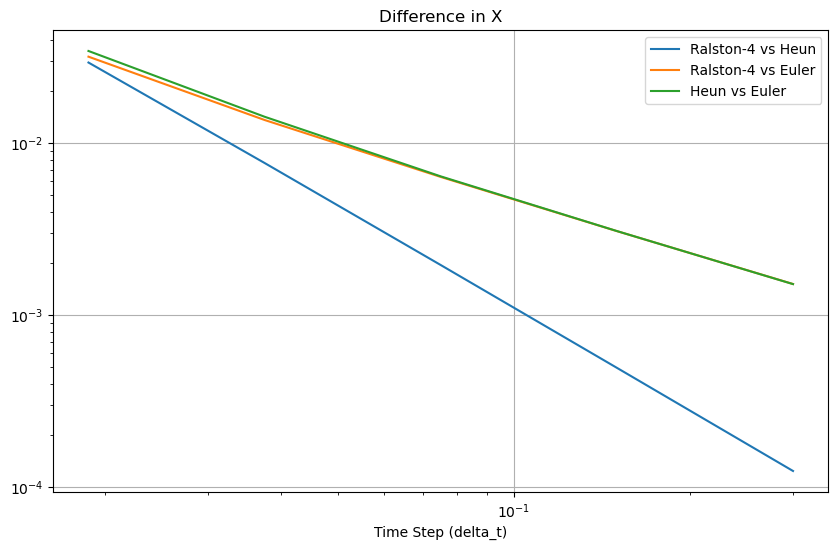

In [10]:
time_steps = [T / 1600, T / 800, T / 400, T / 200, T / 100]

abs_errors_ralston_heun = []
abs_errors_ralston_euler = []
abs_errors_heun_euler = []

#Ralston-4
plt.figure(figsize=(10, 6))
for i, (t_ralston, y_ralston) in enumerate(results_ralston):
    t_heun, y_heun = results_heun[i][0], results_heun[i][1]
    t_euler, X_euler, Y_euler = results_euler[i]

    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t_ralston), len(t_heun), len(t_euler))

    abs_error_ralston_heun = np.abs(y_ralston[:min_len, 0] - y_heun[:min_len, 0])

    X_euler = np.array(X_euler)
    abs_error_ralston_euler = np.abs(y_ralston[:min_len, 0] - X_euler[:min_len])

    abs_error_heun_euler = np.abs(y_heun[:min_len, 0] - X_euler[:min_len])

    abs_errors_ralston_heun.append(abs_error_ralston_heun.mean())
    abs_errors_ralston_euler.append(abs_error_ralston_euler.mean())
    abs_errors_heun_euler.append(abs_error_heun_euler.mean())


plt.plot(time_steps, abs_errors_ralston_heun, label='Ralston-4 vs Heun')
plt.plot(time_steps, abs_errors_ralston_euler, label='Ralston-4 vs Euler')
plt.plot(time_steps, abs_errors_heun_euler, label='Heun vs Euler')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('')
plt.title('Difference in X')
plt.legend()
plt.grid(True)
plt.show()


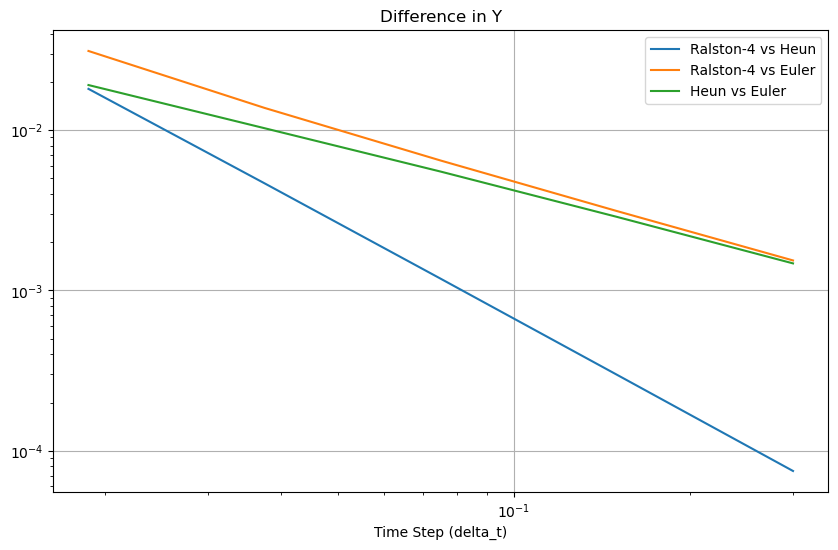

In [11]:
time_steps = [T / 1600, T / 800, T / 400, T / 200, T / 100]

abs_errors_ralston_heun_y = []
abs_errors_ralston_euler_y = []
abs_errors_heun_euler_y = []

#Ralston-4
plt.figure(figsize=(10, 6))
for i, (t_ralston, y_ralston) in enumerate(results_ralston):
    t_heun, y_heun = results_heun[i][0], results_heun[i][1]
    t_euler, X_euler, Y_euler = results_euler[i]

    delta_t_label = f'T/{int(T/time_steps[i])}'

    min_len = min(len(t_ralston), len(t_heun), len(t_euler))

    abs_error_ralston_heun_y = np.abs(y_ralston[:min_len, 1] - y_heun[:min_len, 1])

    abs_error_ralston_euler_y = np.abs(y_ralston[:min_len, 1] - Y_euler[:min_len])

    abs_error_heun_euler_y = np.abs(y_heun[:min_len, 1] - Y_euler[:min_len])

    abs_errors_ralston_heun_y.append(abs_error_ralston_heun_y.mean())
    abs_errors_ralston_euler_y.append(abs_error_ralston_euler_y.mean())
    abs_errors_heun_euler_y.append(abs_error_heun_euler_y.mean())

plt.plot(time_steps, abs_errors_ralston_heun_y, label='Ralston-4 vs Heun')
plt.plot(time_steps, abs_errors_ralston_euler_y, label='Ralston-4 vs Euler')
plt.plot(time_steps, abs_errors_heun_euler_y, label='Heun vs Euler')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('')
plt.title('Difference in Y')
plt.legend()
plt.grid(True)
plt.show()


Next, we will record the runtime and take the average for test case 2b.

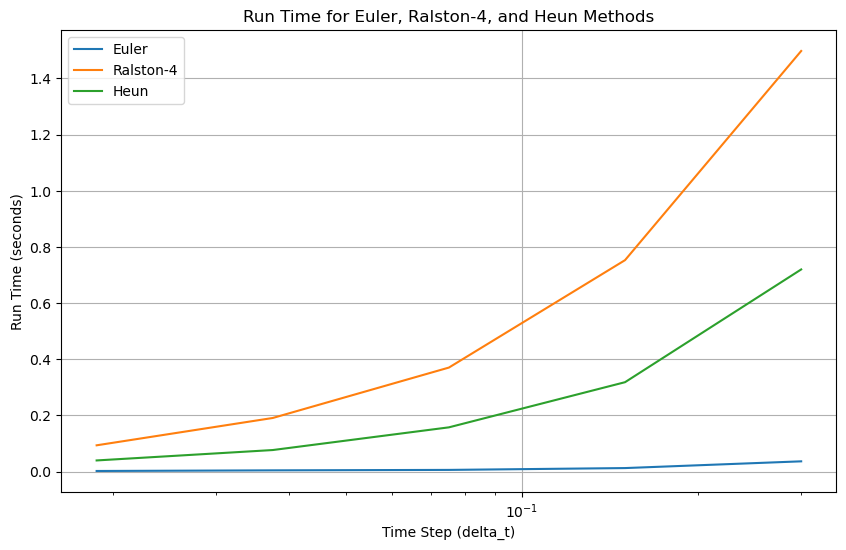

In [12]:
def euler_method_timing():
    return euler_method(x0, y0, t, T, delta_t, alpha, beta, delta, gamma)

def ralston_4_timing():
    return solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Ralston-4")

def heun_timing():
    return solver(rhs1, np.array([x0, y0]), 0.0, delta_t, T, "Heun")

time_steps = [T / 100, T / 200, T / 400, T / 800, T / 1600]

euler_runtimes = []
ralston_4_runtimes = []
heun_runtimes = []

for delta_t in time_steps:
    euler_time = timeit.timeit(euler_method_timing, number=10)
    ralston_4_time = timeit.timeit(ralston_4_timing, number=10)
    heun_time = timeit.timeit(heun_timing, number=10)

    euler_runtimes.append(euler_time)
    ralston_4_runtimes.append(ralston_4_time)
    heun_runtimes.append(heun_time)

plt.figure(figsize=(10, 6))
plt.plot(time_steps[::-1], euler_runtimes, label='Euler')
plt.plot(time_steps[::-1], ralston_4_runtimes, label='Ralston-4')
plt.plot(time_steps[::-1], heun_runtimes, label='Heun')

plt.xscale('log')
plt.xlabel('Time Step (delta_t)')
plt.ylabel('Run Time (seconds)')
plt.title('Run Time for Euler, Ralston-4, and Heun Methods')
plt.legend()
plt.grid(True)
plt.show()

## Analysis

[*Comment on the efficiency and accuracy of each approach. [250 words]*]

Eulers Method

We can rely on Euler's Method as the solution show a similar trend to the exact solution in test case 2a. It's evident that reducing the time step (dt) leads to smaller absolute errors and differences in solutions for both test case 2a and 2b. We could observe the absolute error is linearly decrease and This method have the largest difference and absolute error for every time steps (dt). From, this we could understand, this method have the lowest accuracy.

The runtime is initially very low. As the (dt) increase, the time step increase. When (dt) is smallest, T/1600, the runtime for this method have only marginal increase in runtime which is below 0.01 seconds for both test cases. The runtime for this method is lowest for both of the test cases

Heun Method

We can rely on Heun Method as the solution show a similar trend to the exact solution in test case 2a. As we reduce the time steps (dt), the absolute error and the difference is decreased for both cases, 2a and 2b. The absolute error and difference for this method have linearly decrease over time steps (dt). The absolute error and differences is very marginal making this method is the second accurate method.

Initally, the runtime for this method is very low. However as the time steps (dt) increase, the runtime have increase largely. The runtime for this method is approximately exponent making this methond the second efficient method 

Ralston-4 Method

We can rely on Heun Method as the solution show a similar trend to the exact solution in test case 2a. The absolute errors and the difference decreases as the time steps (dt) size decreases. This method have the smallest absolute error and difference for both of the test cases. With this result, this method is the most accurate method.

The runtime for this method is the most expensive from the three methods. The runtime growth exponentially as the dt become smaller.



## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]

We observe that all methods yield solutions almost identical to the exact solution for test case 2a, with small differences for test case 2b. Euler's method has the smallest runtime, making it the fastest and most efficient. However, a problem arises regarding the accuracy of the solution for this method, as it demonstrates the lowest accuracy compared to all three methods.

Next, the Ralston-4 method is the most accurate because it has the lowest absolute error and difference for both test cases. However, the Ralston-4 method has the longest average runtime compared to the other two methods, making it the most expensive.

Moving on to the Heun method, it has higher accuracy in solution compared to the solution from the Euler method but lower accuracy compared to the Ralston-4 method. This is because the Heun method's solution has lower absolute error and difference but not lower than the solution by the Ralston-4 method. The average runtime for this method is also in between the runtimes for the Euler method and Ralston-4 method.

Analyzing the graphs, we see that Ralston-4 converges fastest to the exact solution as the time steps (dt) become smaller, but this comes at the expense of efficiency. The same case applies to the Euler method, which is the cheapest method but the least accurate. Therefore, considering both efficiency and accuracy, we choose the Heun method.

## Reference

(No date) Matplotlib plotting. Available at: https://www.w3schools.com/python/matplotlib_plotting.asp (Accessed: 17 December 2023). 